# Visualizing Data in Python

When working with a new dataset, one of the most useful things to do is to begin to visualize the data. By using **tables**, **histograms**, **boxplots**, **scatter plots** and other visual tools, we can get a better idea of what the data may be trying to tell us, and we can gain insights into the data that we may have not discovered otherwise.

In this notebook will use the [Seaborn](https://seaborn.pydata.org/) data processing library, which is a higher-level interface to **Matplotlib** that can be used to simplify many visualization tasks

The **Seaborn** provides visualisations tools that will allow to explore data from a graphical perspective.


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan

# Importing libraries

In [2]:
# Import the packages that we will be using
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Importing data

In [4]:
# Define where you are running the code: colab or local
RunInColab          = False     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

else:
    # Define path del proyecto
    Ruta            = ""

In [6]:
# url string that hosts our .csv file
url = "cartwheel.csv"

# Read the .csv file and store it as a pandas Data Frame
df = pd.read_csv(Ruta + url)



# Exploring the content of the data set

Get a general 'feel' of the data


In [14]:

df.head()

,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56.0,F,1,Y,1,62.0,61.0,79,Y,1.0,7
1,2,26.0,F,1,Y,1,62.0,60.0,70,Y,1.0,8
2,3,33.0,F,1,Y,1,66.0,64.0,85,Y,1.0,7
3,4,39.0,F,1,N,0,64.0,63.0,87,Y,1.0,10
4,5,27.0,M,2,N,0,73.0,75.0,72,N,0.0,4


# Frequency tables

The `value_counts()` method can be used to determine the number of times that each distinct value of a variable occurs in a data set.  In statistical terms, this is the "frequency distribution" of the variable. The `value_counts()` method produces a table with two columns.  The first column contains all distinct observed values for the variable.  The second column contains the number of times each of these values occurs.  Note that the table returned by `value_counts()` is actually a **Pandas** data frame, so can be further processed using any Pandas methods for working with data frames.


In [19]:
# Number of times that each distinct value of a variable occurs in a data set

df["Gender"].value_counts()

Gender
F    26
M    26
Name: count, dtype: int64

In [18]:
# Proportion of each distinct value of a variable occurs in a data set
df["Gender"].value_counts(normalize=True)

df["Glasses"].value_counts(normalize=True)


Glasses
Y    0.5
N    0.5
Name: proportion, dtype: float64

Note that the `value_counts()` method excludes missing values. We confirm this below by adding up observations to your data frame with some missing values and then computing `value_counts()` and comparing this to the total number of rows in the data set, which is 28. This tells us that there are 28 - (21+6) = 1 missing values for this variable (other variables may have different numbers of missing values).

In [27]:
# Total number of observations
print(df.shape[0])


# total number of null observations in Age
print(pd.isnull(df.Age).sum())


# Total number of counts in Age (excluding missing values)
print( df.Height.notnull().sum() )



52
1
51


# Histogram

It is often good to get a feel for the shape of the distribution of the data.

Text(0.5, 1.0, 'Histogram of Age Distribution')

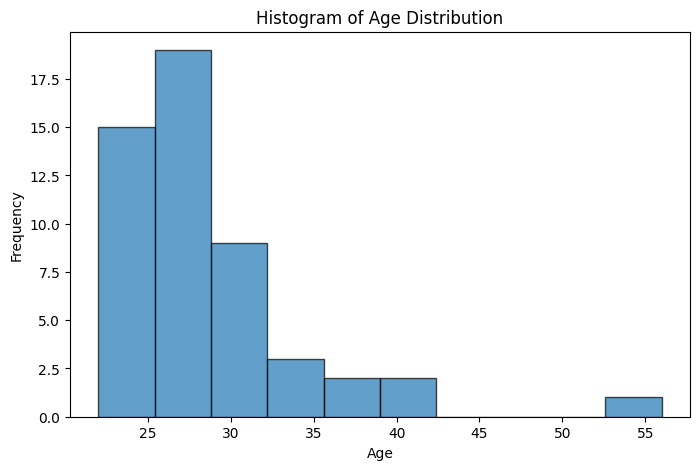

In [29]:
# Plot histogram of Age
histogram = df["Age"].plot(kind="hist", bins=10, edgecolor="black", alpha=0.7, figsize=(8,5))
histogram.set_xlabel("Age")
histogram.set_ylabel("Frequency")
histogram.set_title("Histogram of Age Distribution")


Text(0.5, 1.0, 'Histogram of CWDistance Distribution')

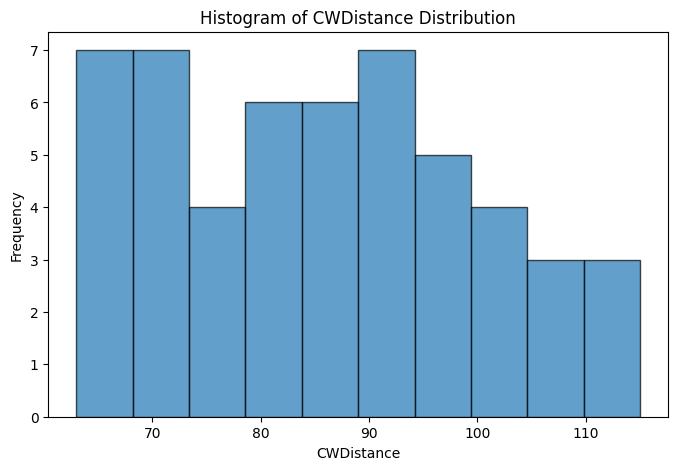

In [32]:
# Plot distribution of CWDistance
histogram = df["CWDistance"].plot(kind="hist", bins=10, edgecolor="black", alpha=0.7, figsize=(8,5))
histogram.set_xlabel("CWDistance")
histogram.set_ylabel("Frequency")
histogram.set_title("Histogram of CWDistance Distribution")


Text(0.5, 1.0, 'Histogram of Age and Wingspan Distribution')

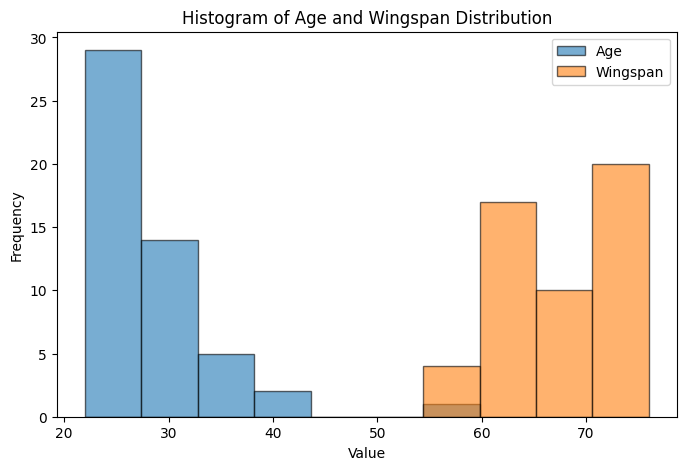

In [33]:
# Plot histogram of both the Age and the Wingspan
histogram = df[["Age", "Wingspan"]].plot(kind="hist", bins=10, alpha=0.6, edgecolor="black", figsize=(8,5), legend=True)

histogram.set_xlabel("Value")
histogram.set_ylabel("Frequency")
histogram.set_title("Histogram of Age and Wingspan Distribution")


# Histograms plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a histograms of one quantitative variable grouped by another categorical variables.

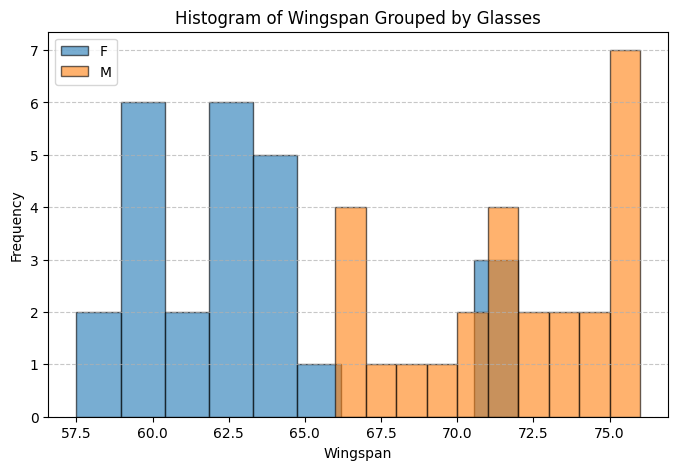

In [43]:

histogram = df.groupby("Gender")["Wingspan"].plot(kind="hist", bins=10, alpha=0.6, edgecolor="black", figsize=(8,5), legend=True)

plt.xlabel("Wingspan")
plt.ylabel("Frequency")
plt.title("Histogram of Wingspan Grouped by Glasses")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Boxplots

Boxplots do not show the shape of the distribution, but they can give us a better idea about the center and spread of the distribution as well as any potential outliers that may exist. Boxplots and Histograms often complement each other and help an analyst get more information about the data

Text(0.5, 1.0, 'Boxplot of CWDistance')

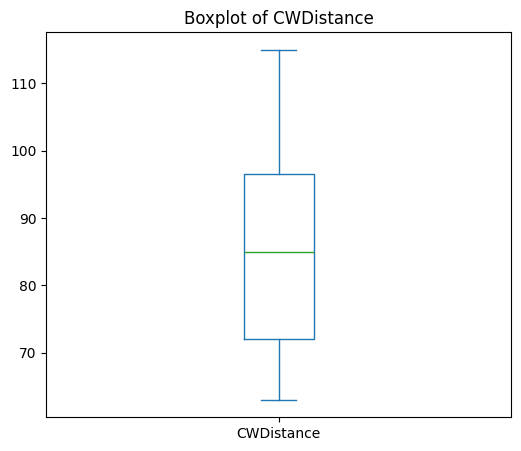

In [45]:
# Create the boxplot of the "CWDistance"

boxplot = df["CWDistance"].plot(kind="box", figsize=(6,5))

boxplot.set_title("Boxplot of CWDistance")


Text(0.5, 1.0, 'Boxplot of Height')

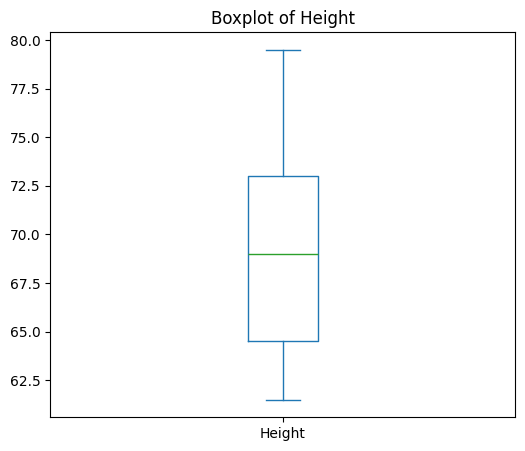

In [47]:
# Create the boxplot of the "Height"


boxplot = df["Height"].plot(kind="box", figsize=(6,5))

boxplot.set_title("Boxplot of Height")

Text(0.5, 1.0, 'Boxplots of CWDistance, Height, and Wingspan')

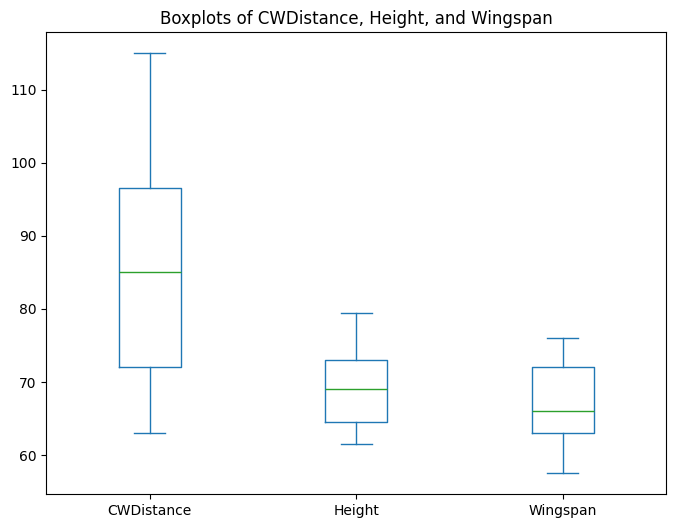

In [48]:
# Create the boxplots of the "CWDistance", "Height" and "Wingspan"
boxplot = df[["CWDistance", "Height", "Wingspan"]].plot(kind="box", figsize=(8,6))

boxplot.set_title("Boxplots of CWDistance, Height, and Wingspan")


Text(0.5, 1.0, 'Boxplots of CWDistance, Height, and Wingspan')

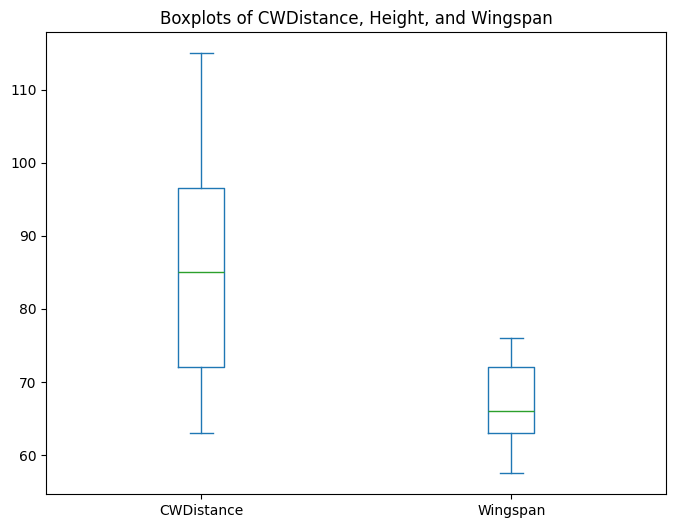

In [49]:
# Create the boxplots of the "CWDistance" and of the "Wingspan"

boxplot = df[["CWDistance", "Wingspan"]].plot(kind="box", figsize=(8,6))

boxplot.set_title("Boxplots of CWDistance, Height, and Wingspan")

# Boxplots plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a side-by-side boxplots of one quantitative variable grouped by another categorical variables.

<Axes: ylabel='CWDistance'>

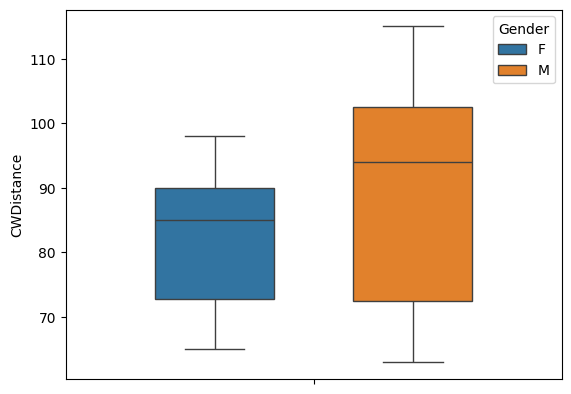

In [50]:
# Create side-by-side boxplots of the "CWDistance" grouped by "Gender"
sns.boxplot(data=df, y='CWDistance', hue='Gender', gap=.4)



<Axes: xlabel='Glasses', ylabel='Height'>

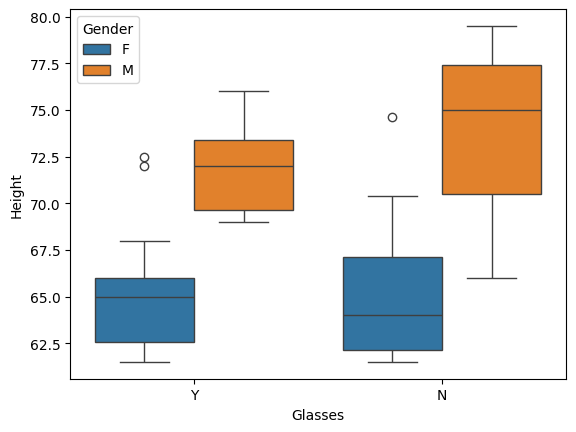

In [51]:
# Create side-by-side boxplots of the "Glasses" grouped by "Gender"
sns.boxplot(data=df, x="Glasses", y="Height", hue="Gender")



# Histograms and boxplots plotted by groups

We cal also create both boxplots and histograms of one quantitative variable grouped by another categorical variables


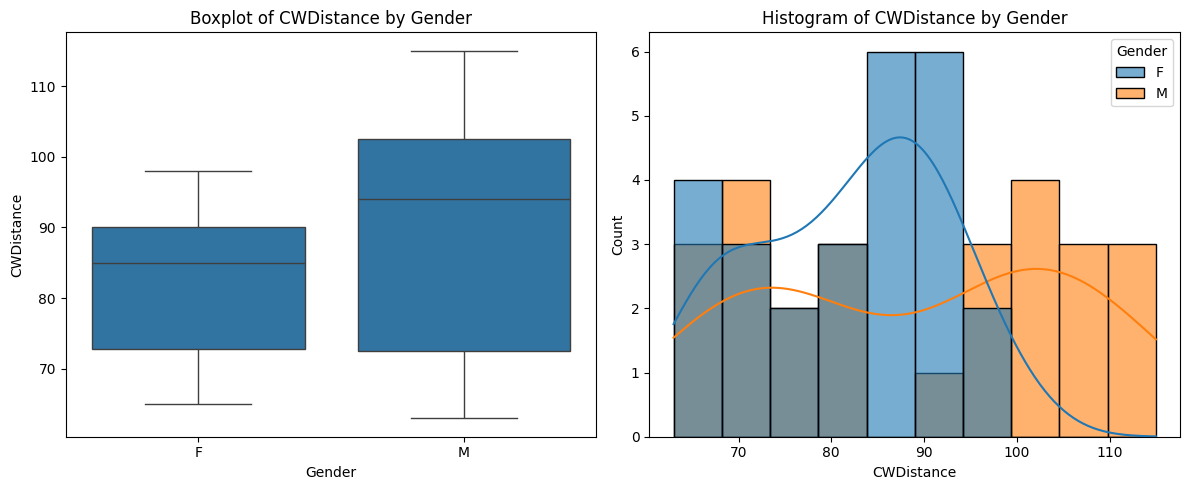

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.boxplot(data=df, x="Gender", y="CWDistance", ax=axes[0])
axes[0].set_title("Boxplot of CWDistance by Gender")

sns.histplot(data=df, x="CWDistance", hue="Gender", bins=10, alpha=0.6, kde=True, ax=axes[1])
axes[1].set_title("Histogram of CWDistance by Gender")

plt.show()


# Scatter plot

Plot values of one variable versus another variable to see how they are correlated

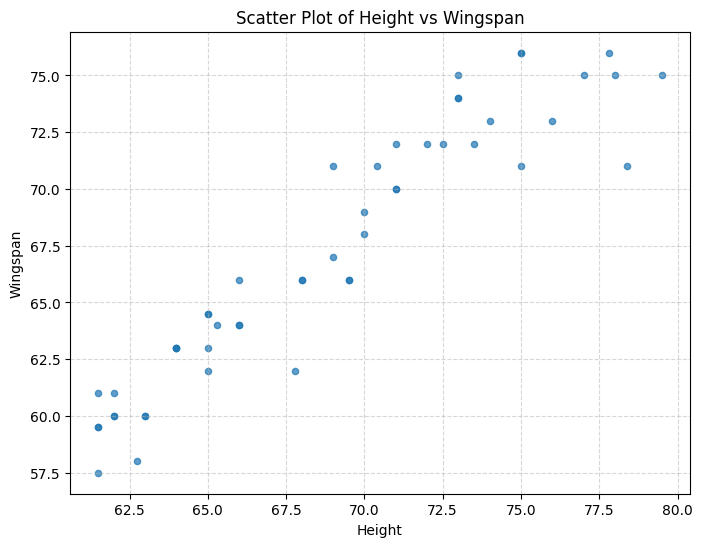

In [62]:
# scatter plot between two variables
scatter = df.plot(kind="scatter", x="Height", y="Wingspan", figsize=(8,6), alpha=0.7)

# Customize labels and title
scatter.set_xlabel("Height")
scatter.set_ylabel("Wingspan")
scatter.set_title("Scatter Plot of Height vs Wingspan")

plt.grid(True, linestyle='--', alpha=0.5)

Text(0.5, 1.0, 'Scatter Plot of CWDistance by Gender')

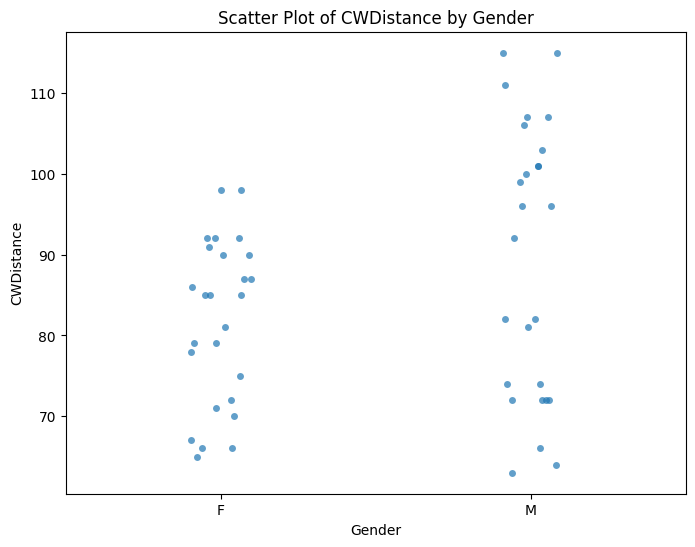

In [63]:
# scatter plot between two variables (one categorical)
plt.figure(figsize=(8,6))
sns.stripplot(data=df, x="Gender", y="CWDistance", jitter=True, alpha=0.7)

plt.xlabel("Gender")
plt.ylabel("CWDistance")
plt.title("Scatter Plot of CWDistance by Gender")


Text(0.5, 1.0, 'Scatter Plot of CWDistance by Gender')

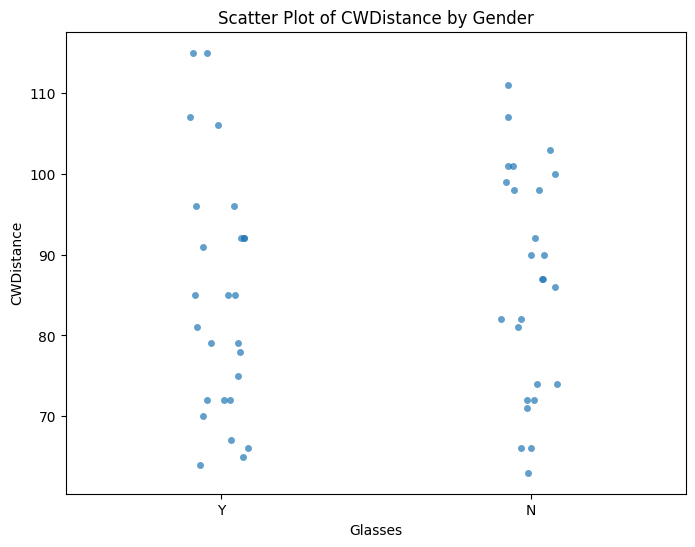

In [65]:
# scatter plot between two variables (one categorical)
plt.figure(figsize=(8,6))
sns.stripplot(data=df, x="Glasses", y="CWDistance", jitter=True, alpha=0.7)

plt.xlabel("Glasses")
plt.ylabel("CWDistance")
plt.title("Scatter Plot of CWDistance by Gender")

Text(0.5, 1.0, 'Scatter Plot of Height vs Wingspan Grouped by Gender')

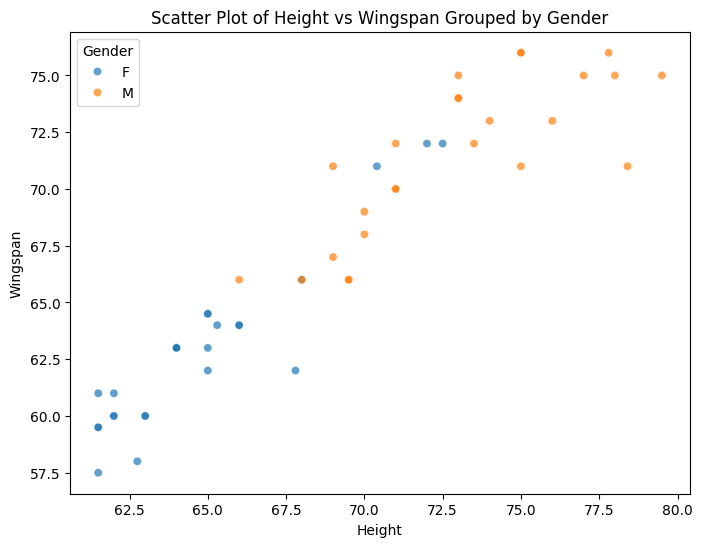

In [66]:
# scatter plot between two variables grouped according to a categorical variable
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Height", y="Wingspan", hue="Gender", alpha=0.7)

plt.xlabel("Height")
plt.ylabel("Wingspan")
plt.title("Scatter Plot of Height vs Wingspan Grouped by Gender")


Text(0.5, 1.0, 'Scatter Plot of Height vs Wingspan Grouped by Gender with Marker Size')

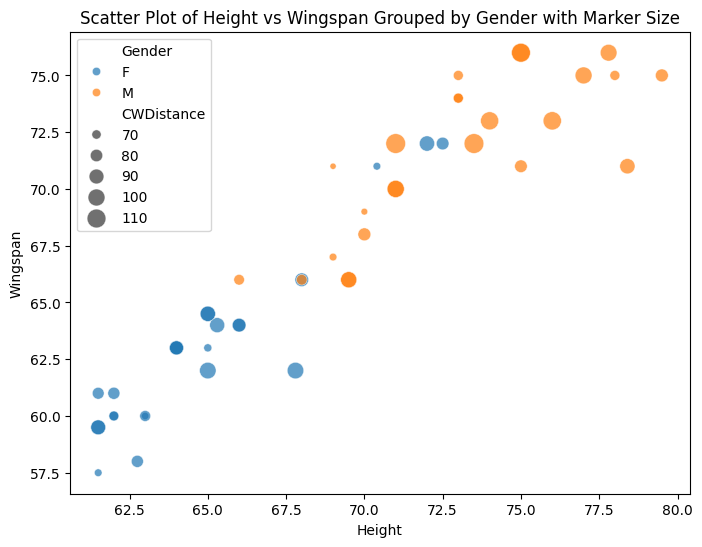

In [67]:
# scatter plot between two variables grouped according to a categorical variable and with size of markers
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Height", y="Wingspan", hue="Gender", size="CWDistance", sizes=(20, 200), alpha=0.7)

plt.xlabel("Height")
plt.ylabel("Wingspan")
plt.title("Scatter Plot of Height vs Wingspan Grouped by Gender with Marker Size")


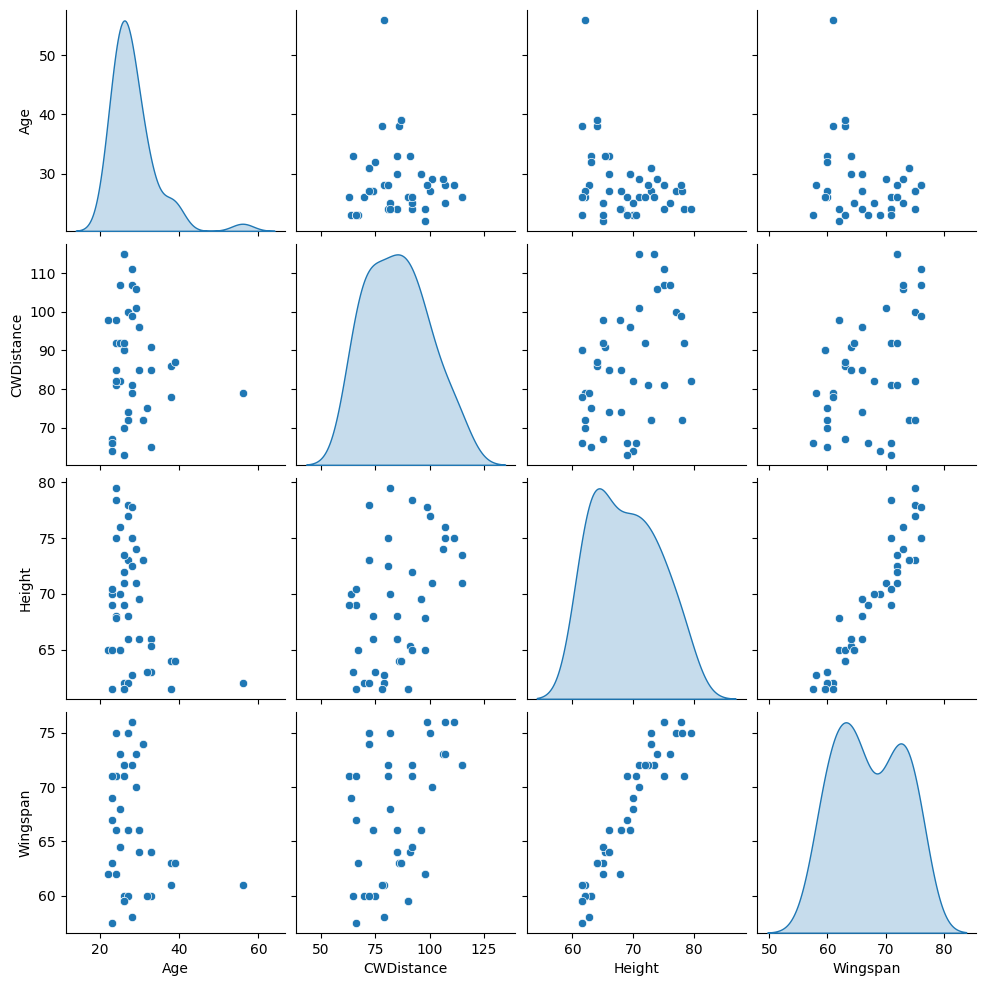

In [69]:
# Pairplot: Scatterplot of "Age","CWDistance","Height",'Wingspan'

pairplot = df[["Age", "CWDistance", "Height", "Wingspan"]].apply(pd.to_numeric, errors="coerce").dropna()

sns.pairplot(pairplot, diag_kind="kde")

# Final remarks


- Visualizing your data using **tables**, **histograms**, **boxplots**, **scatter plots** and other tools is essential to carry put analysis and extract conclusions

- There are several ways to do the same thing

- The **Seaborn** package provides visualisations tools that allow to explore data from a graphical perspective


# Activity: work with the iris dataset

Repeat this tutorial with the iris data set and respond to the following inquiries

1. Plot the histograms for each of the four quantitative variables


2. Plot the histograms for each of the quantitative variables


3. Plot the boxplots for each of the quantitative variables


4. Plot the boxplots of the petal width grouped by type of flower


5. Plot the boxplots of the setal length grouped by type of flower


6. Provide a description (explaination from your observations) of each of the quantitative variables
